In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import beta

plt.rcParams.update({"text.usetex": True, 'font.size': 18, 'font.family': 'serif', "figure.figsize": [12, 7]})


def cdf(series: pd.Series) -> pd.DataFrame:
    """ calculates the cumulative distribution function of the given series"""
    return pd.DataFrame.from_dict({
        series.name: np.append(series.sort_values(), series.max()),
        "cdf": np.linspace(0, 1, len(series) + 1)
    })

In [4]:
df = pd.read_csv("unreachable.logs.csv", header=None)

In [6]:
df_dists = df.copy()
for i in range(20):
    df_dists[i] = (i + 1) / (df_dists[i] + 1)

Text(0, 0.5, 'Mean Distance')

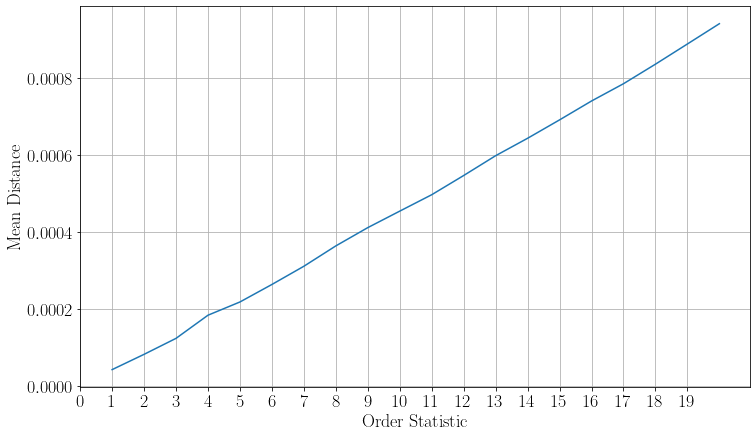

In [7]:
fig, ax = plt.subplots()

xs = np.arange(0, 20, step=1)
ax.plot(xs + 1, df_dists.mean()); ax.grid(); ax.set_xticks(xs)
ax.set_xlabel("Order Statistic"); ax.set_ylabel("Mean Distance")

In [26]:
p, cov = np.polyfit(xs + 1, df_dists.mean(), 1, cov=True)
print("slope:", p[0])
print("err:", np.sqrt(np.diag(cov))[0])

slope: 4.712048076980005e-05
err: 2.1543111227933773e-07


In [28]:
print("Size: ", 1/p[0]-1)
print("Error: ", np.sqrt(np.diag(cov))[0]/(p[0]*p[0]))

Size:  21221.19433382584
Error:  97.0261944626538


In [20]:
np.mean((np.indices([20])+1)/np.array(df_dists.mean())-1), np.std((np.indices([20])+1)/np.array(df_dists.mean())-1)

(22164.515147030106, 765.0589060353522)

In [ ]:
fig, ax = plt.subplots()
for k in range(3, 4):
    ax.hist(df[k], density=True, alpha=0.6, bins=100)

In [118]:
t = 5
df_flat = pd.concat([df.iloc[:, t:][col] for col in df.iloc[:, t:]], ignore_index=True)

In [119]:
df_flat.mean(), df_flat.std(), df_flat.median(), df_flat.mad()

(24512.73193137255, 7198.2835666896235, 24073.13, 5739.8124150903495)

<AxesSubplot:>

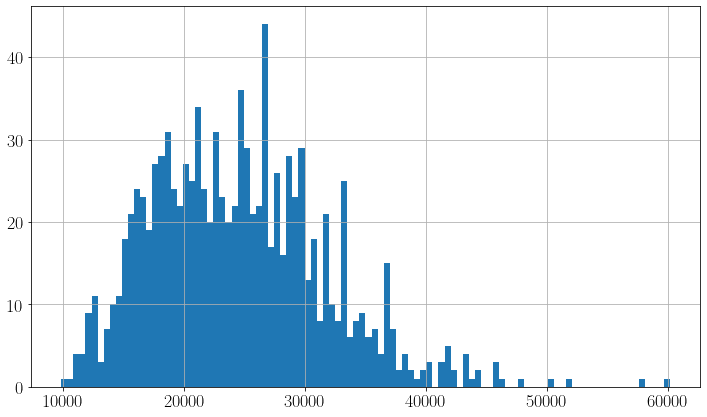

In [121]:
df_flat.hist(bins=100)

In [240]:
N = 17_000
K = 20

estimates = []
all = []
for i in range(10_000):
    vals = []
    for k in range(1, K + 1):
        vals += [np.random.beta(a=k, b=N - k + 1)]
    vals = np.sort(vals)
    all += [vals]
    es = []
    for j in range(1, K + 1):
        es += [(j / vals[j - 1]) - 1]

    estimates += [es]
df_num = pd.DataFrame(estimates)
df_num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9708.997226,12965.759138,12909.438611,16831.894681,19053.420212,19967.209596,22677.357457,24148.495774,20576.215992,21355.781501,23234.047611,17632.129701,17612.993315,18354.971184,18035.246089,19229.478623,15895.180464,14715.153907,14991.023688,15427.309995
1,33239.830343,18212.237406,17405.353604,22058.051920,21101.596236,13974.695174,16193.224208,16718.379833,16663.766197,18133.238255,19784.289385,20051.818711,19307.522259,19281.325438,20325.477928,17626.065092,17157.882514,16348.127481,15191.644021,15475.582740
2,508310.552244,16498.610735,24599.006697,24753.737226,16689.835570,15264.777202,16278.110016,18357.505183,16444.575833,16521.366424,17464.713951,17312.023463,17912.338870,16326.996862,16045.247777,17024.399368,17466.105657,12065.540344,12092.834190,12478.268073
3,36591.751010,13655.365500,17894.986768,16424.246722,20169.136837,22400.637290,24551.195985,18555.475833,17685.390736,18018.286313,17699.622890,17679.768881,18054.905149,13699.942751,14379.338996,14579.256826,15210.741497,14939.392518,12638.039289,9486.114778
4,17906.655892,19880.319633,15732.574685,20374.452119,24007.683649,16106.957940,17413.890404,17667.020737,18743.881104,19615.496816,15936.965666,17155.779027,17649.735587,17686.300423,17809.380879,16468.806073,15148.204831,15700.953395,14276.989944,14465.170553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,56460.372698,16642.532155,22222.523440,16983.217786,18706.582657,19697.239833,15711.355803,16094.218225,16238.033061,17734.619488,17821.263570,17386.443327,18534.402370,16644.481167,17240.699778,17617.265606,17655.345618,18325.349282,15997.621657,14729.600458
9996,38939.587137,30031.078888,24261.491828,30058.158656,15839.988409,17000.787312,16968.106159,18810.771535,17752.436295,18499.689371,16413.168168,16114.758322,15900.659614,16969.350525,16354.287611,16830.149630,15416.461815,14224.689234,14384.961292,13083.542194
9997,35633.627811,27801.320412,14344.747529,16210.503234,18228.745572,20608.501535,20923.566676,17563.046166,17334.845080,18558.279592,17456.303629,17728.155614,15769.822192,16973.238036,14637.216895,13611.790057,13763.827307,14532.855336,15108.337650,14907.548159
9998,26836.079869,13820.913131,18721.598990,21913.207027,21797.335026,25267.391418,23154.387663,23791.988589,18427.023283,18618.567883,15518.207003,16178.790437,15938.033206,15190.385213,15963.347447,16480.082274,15086.792001,14744.764750,15389.613202,13893.044773


0     197834.362622
1      27944.414018
2      22547.851820
3      20604.556075
4      19688.312783
5      19104.174502
6      18755.219284
7      18493.686886
8      18311.222908
9      18172.783068
10     18040.843905
11     17925.770442
12     17801.053732
13     17672.703859
14     17509.098261
15     17311.756490
16     17009.876978
17     16596.423621
18     15909.139833
19     14593.031504
dtype: float64

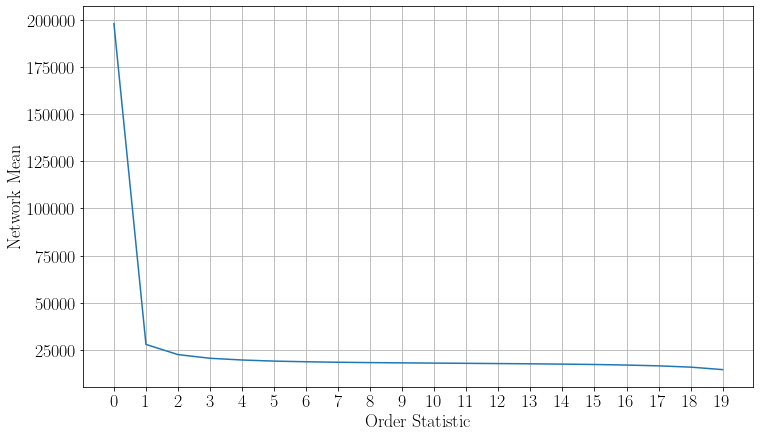

In [241]:
fig, ax = plt.subplots()

xs = np.arange(0, K, step=1)
ax.plot(xs, df_num.mean());
ax.grid();
ax.set_xticks(xs)
ax.set_xlabel("Order Statistic");
ax.set_ylabel("Network Mean")
df_num.mean()

In [183]:
all = np.array(all)

(-0.0001, 0.002)

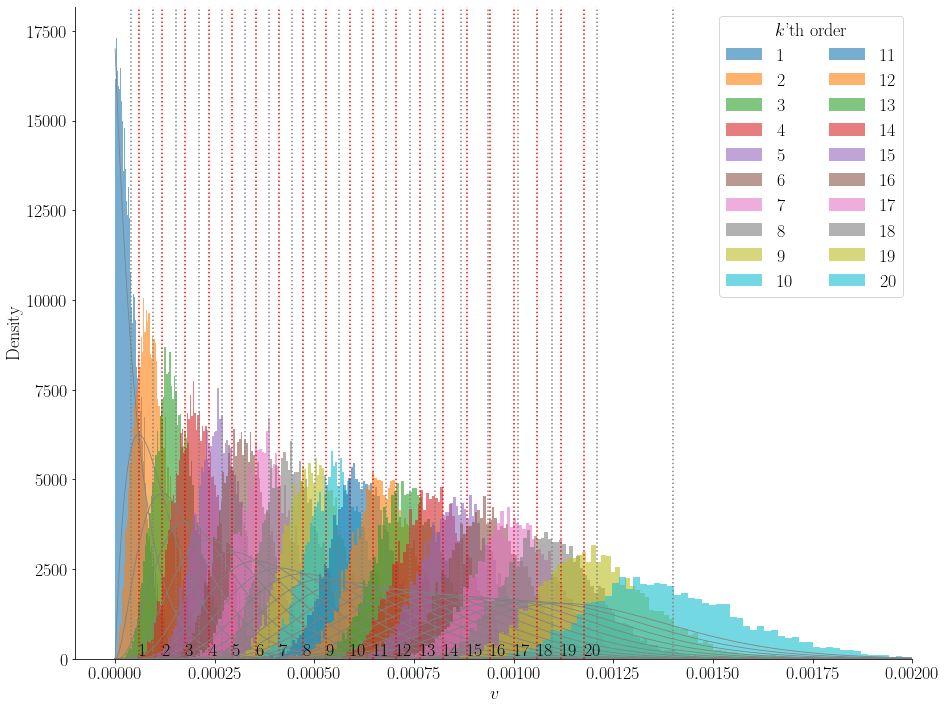

In [189]:
fig, ax = plt.subplots(figsize=[15, 12])
for k in range(K):
    ax.hist(all[:, k], density=True, alpha=0.6, label=f'${k + 1}$', bins=100)
    ax.axvline(all[:, k].mean(), color='gray', linestyle=':')
    ax.axvline((k + 1) / (N + 1), color='red', linestyle=':')
    ax.text((k + 1) / (N + 1), 100, k + 1)
    xs = np.linspace(0, 0.002, 1_000)
    ax.plot(xs, beta.pdf(xs, a=(k + 1), b=N - (k + 1) + 1), color='gray', linestyle='-', linewidth=0.8)
ax.legend(loc='best', title="$k$'th order", ncol=2);
sns.despine()
ax.set_xlabel('$v$');
ax.set_ylabel('Density');
ax.set_xlim(-0.0001, 0.002)